Get packages

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Read to df

In [101]:
df = pd.read_csv('collatz_data.csv')
df.columns = ['num', 'stoptime', 'maxnum']

Func for animation

Plot stopping time

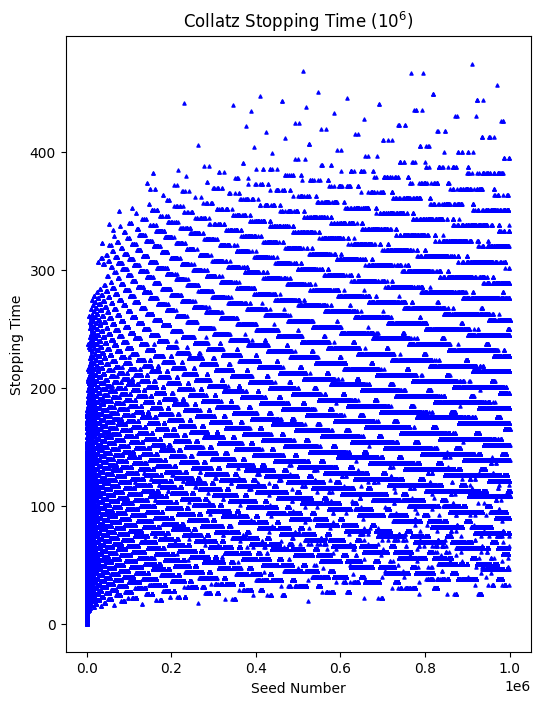

In [102]:
# Create the figure
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title('Collatz Stopping Time ($10^6$)')
ax.set_xlabel('Seed Number')
ax.set_ylabel('Stopping Time')

# Initialize the plot
def init():
    scatter = ax.scatter([], [], marker='^', s=5)
    return [scatter]

# Update dataset
def update(frames):
    offset = 320 * (5**frames)
    subset = df[:offset]
    scatter = ax.scatter(subset['num'], subset['stoptime'], color='blue', marker='^', s=5)
    return [scatter]

# Generate and save animation
anim = FuncAnimation(fig, update, init_func=init, frames=6, repeat=True)
anim.save('stop_times.mp4', writer='ffmpeg', fps=1, dpi=400)

plt.show()


Plot max number in each sequence

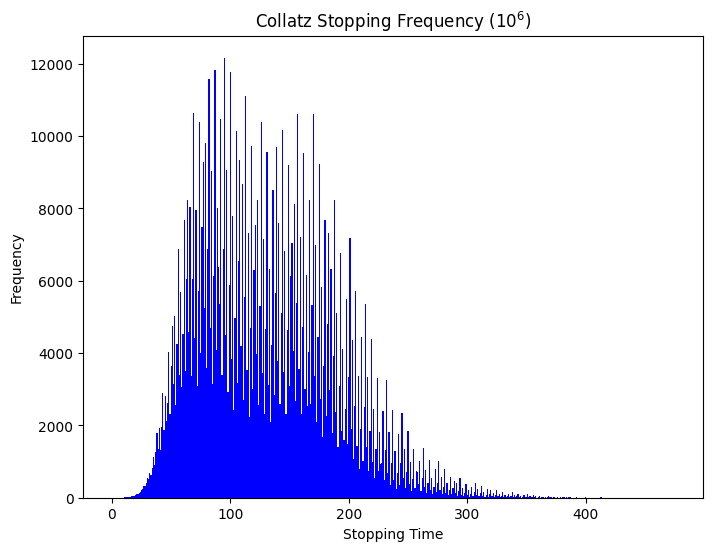

In [ ]:
# Generate frequencies of stop times
frequency = df['stoptime'].value_counts().sort_index()

# Set Vars
plt.figure(figsize=(8, 6))
plt.bar(frequency.index, frequency.values, color='b', width = 1.0)
plt.title('Collatz Stopping Frequency ($10^6$)')
plt.xlabel('Stopping Time')
plt.ylabel('Frequency')

# Save fig
plt.savefig('stop_time_freqs.png', dpi=400)
plt.show()